<a href="https://colab.research.google.com/github/RafalDoroz/mun/blob/main/StackingClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Importujemy potrzebne biblioteki
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Wczytujemy dane - zestaw cancer
cancer = load_breast_cancer()
X = cancer.data  # Dane wejściowe (cechy)
y = cancer.target  # Etykiety (klasy)

# Podział danych na zbiór treningowy i testowy (70% - trening, 30% - test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
# Wersja 1: RandomForest, GradientBoosting, LogisticRegression jako bazowe modele
"""
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)),  # Random Forest
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),  # Gradient Boosting
]
meta_model = LogisticRegression(max_iter=1000)
"""

# Wersja 2: RandomForest, SVC, KNeighborsClassifier jako bazowe modele
"""
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),  # Random Forest
    ('svc', SVC(probability=True, kernel='rbf', C=1.0, random_state=42)),  # Support Vector Classifier
    ('knn', KNeighborsClassifier(n_neighbors=5))  # KNN
]
meta_model = LogisticRegression(max_iter=1000)
"""

# Wersja 3: DecisionTreeClassifier, SVC, GradientBoosting jako bazowe modele
"""
estimators = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),  # Decision Tree
    ('svc', SVC(probability=True, kernel='linear', C=1.0, random_state=42)),  # SVC z jądrem liniowym
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))  # Gradient Boosting
]
meta_model = LogisticRegression(max_iter=1000)
"""

# Wersja 4: RandomForest, DecisionTreeClassifier, LogisticRegression jako bazowe modele
"""
estimators = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),  # Random Forest z większą liczbą drzew
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),  # Decision Tree
]
meta_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)  # SVC jako meta-model
"""

# Wersja 5: GradientBoosting, KNeighborsClassifier, LogisticRegression jako bazowe modele

estimators = [
    ('gb', GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=4, random_state=42)),  # Gradient Boosting
    ('knn', KNeighborsClassifier(n_neighbors=3)),  # KNN
]
meta_model = LogisticRegression(max_iter=1000)


In [25]:
# Meta-model 1: Logistic Regression

meta_model = LogisticRegression(max_iter=1000)


# Meta-model 2: SVC (Support Vector Classifier)
"""
meta_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
"""

# Meta-model 3: KNeighborsClassifier (KNN)
"""
meta_model = KNeighborsClassifier(n_neighbors=5)
"""

# Meta-model 4: Decision Tree
"""
meta_model = DecisionTreeClassifier(max_depth=5, random_state=42)
"""

# Meta-model 5: Random Forest (można używać RF jako meta-model)
"""
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)
"""


'\nmeta_model = RandomForestClassifier(n_estimators=100, random_state=42)\n'

In [26]:
# Inicjalizacja StackingClassifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_model, cv=5, n_jobs=-1)


In [27]:
# Trenujemy model Stacking na danych treningowych
stacking_clf.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('gb',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=4,
                                                           n_estimators=150,
                                                           random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=LogisticRegression(max_iter=1000),
                   n_jobs=-1)

In [28]:
# Dokonujemy predykcji na danych testowych
y_pred = stacking_clf.predict(X_test)


In [29]:
# Wyświetlamy dokładność modelu
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Dokładność modelu Stacking: {accuracy}')

# Wyświetlamy macierz pomyłek
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Macierz pomyłek:\n{conf_matrix}")


Dokładność modelu Stacking: 0.9707602339181286
Macierz pomyłek:
[[ 60   3]
 [  2 106]]


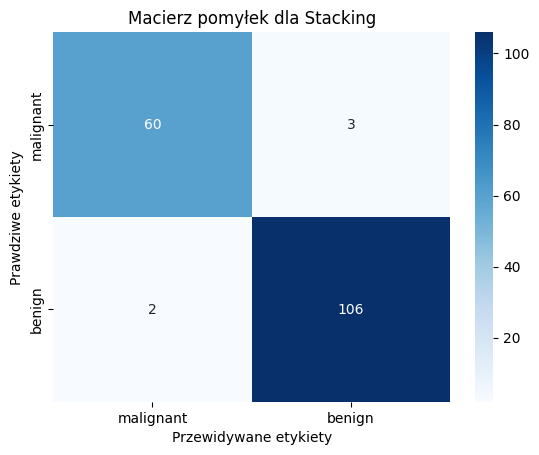

In [30]:
# Wizualizacja macierzy pomyłek
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Przewidywane etykiety')
plt.ylabel('Prawdziwe etykiety')
plt.title('Macierz pomyłek dla Stacking')
plt.show()
